In [1]:
import cv2
import matplotlib.image
import matplotlib.pyplot as plt
import numpy as np
import glob
%matplotlib inline

findChessBoardCorners for ./camera_cal/calibration1.jpg failed
findChessBoardCorners for ./camera_cal/calibration4.jpg failed
findChessBoardCorners for ./camera_cal/calibration5.jpg failed


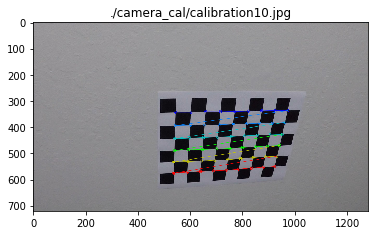

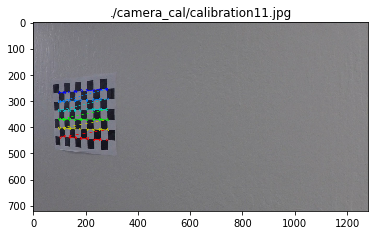

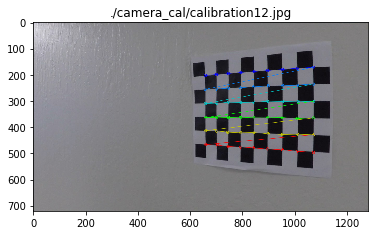

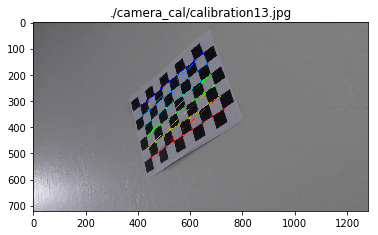

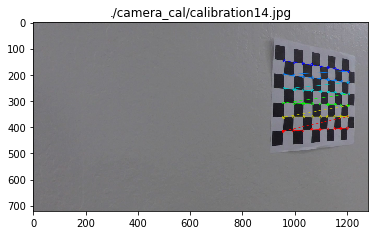

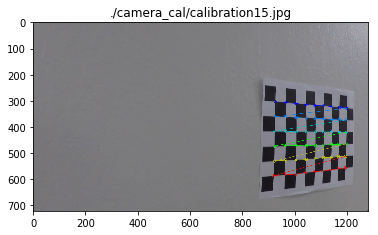

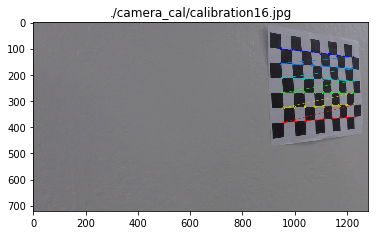

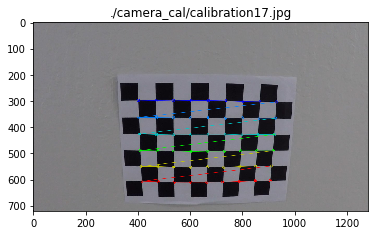

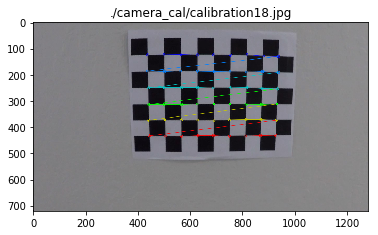

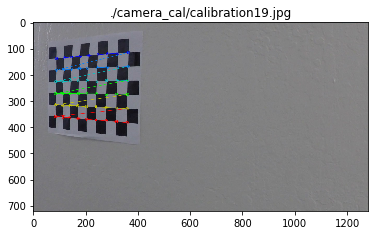

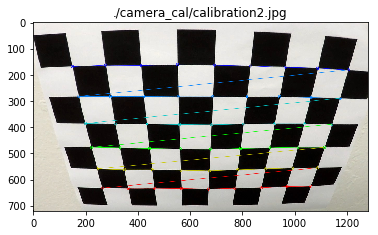

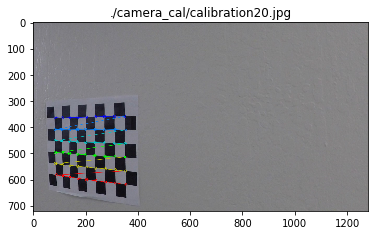

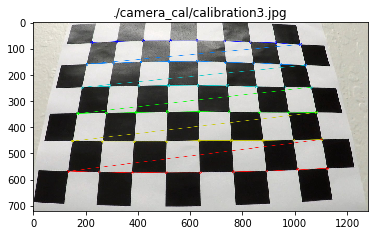

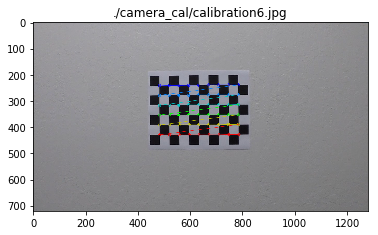

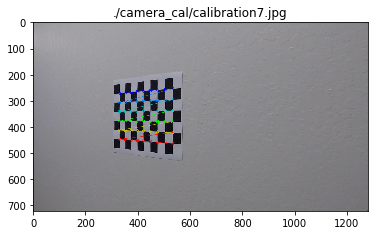

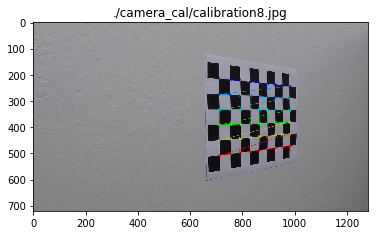

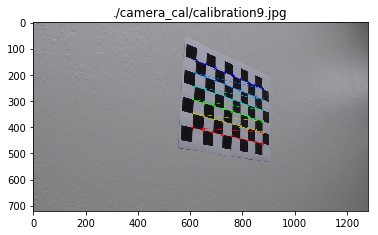

In [2]:
import CalibrateCamera
import os

files = os.listdir('./camera_cal')
files = [ './camera_cal/{}'.format(file) for file in files ]
calibrate = CalibrateCamera.Calibrate(files)

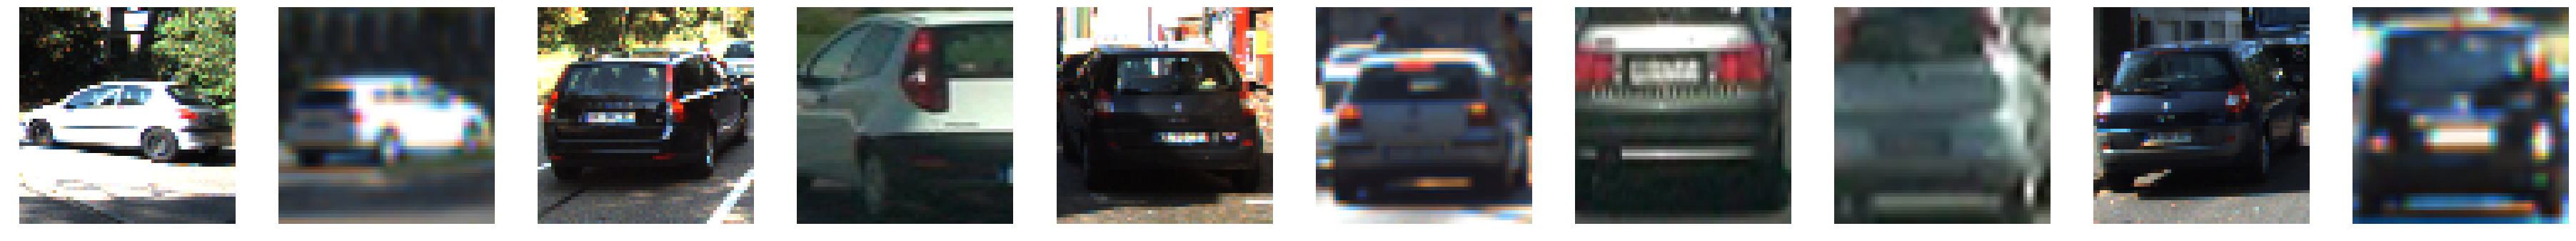

In [3]:
import glob
import random
from ImagePlotter import ImagePlotter
import matplotlib.image
%matplotlib inline

car_files = glob.glob('data/vehicles/*/*.png')
plotter = ImagePlotter(num_images=10, grid=(1,10), figsize=(64, 64))
for i in range(1, 11):
    choice = random.randint(1, len(car_files))
    image = matplotlib.image.imread(car_files[choice])
    plotter(image)

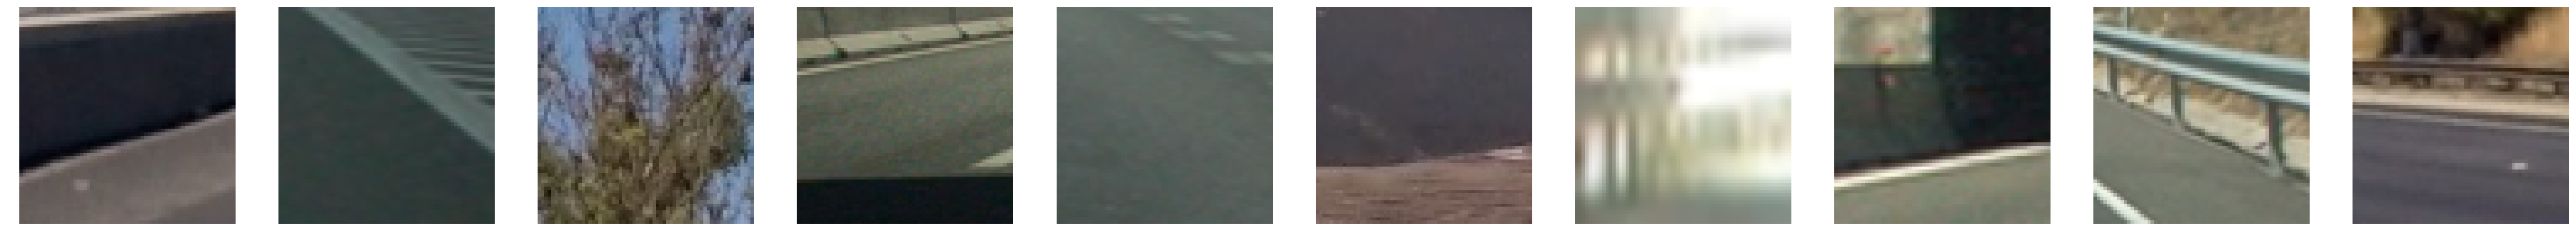

In [4]:
import glob
import random
from ImagePlotter import ImagePlotter
import matplotlib.image
%matplotlib inline


non_car_files = glob.glob('data/non-vehicles/*/*.png')
plotter = ImagePlotter(num_images=10, grid=(1,10), figsize=(64, 64))
for i in range(1, 11):
    choice = random.randint(1, len(non_car_files))
    image = matplotlib.image.imread(non_car_files[choice])
    plotter(image)

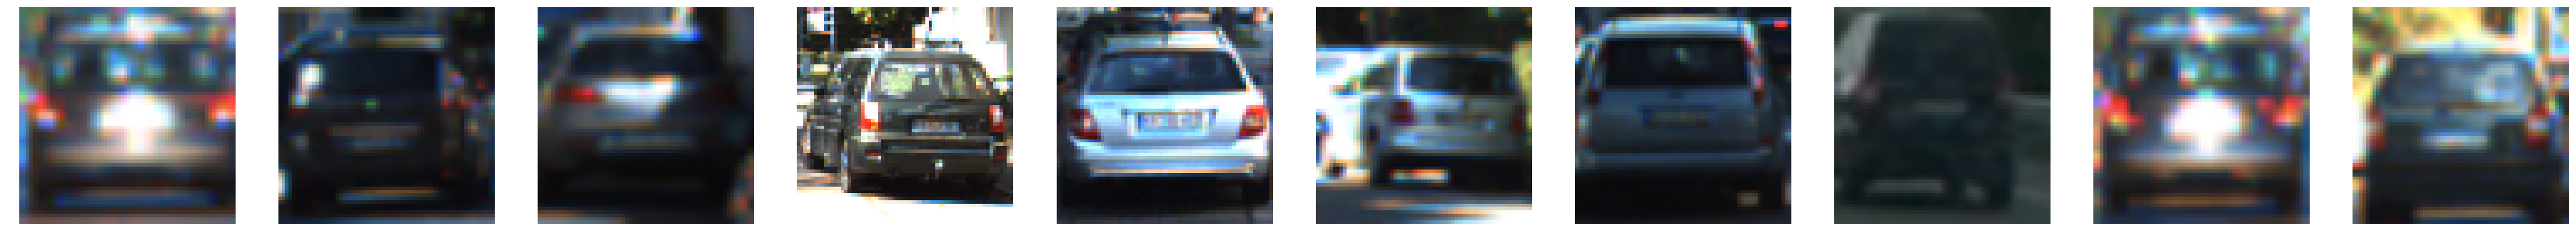

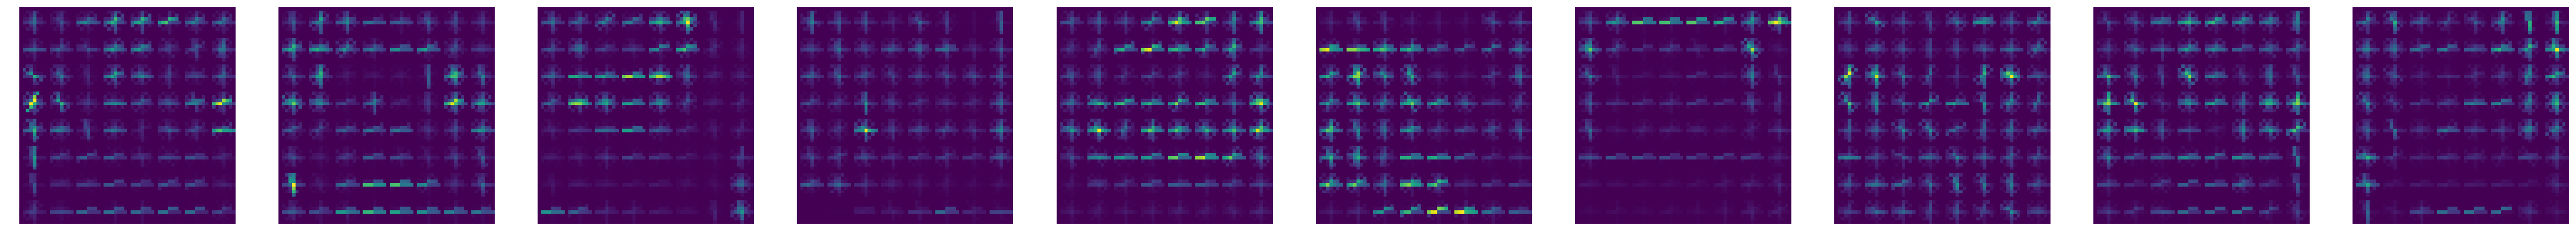

In [5]:
import glob
import random
from ImagePlotter import ImagePlotter
import matplotlib.image
import skimage.feature
import cv2
%matplotlib inline

car_files = glob.glob('data/vehicles/*/*.png')
plotter = ImagePlotter(num_images=10, grid=(1,10), figsize=(64, 64))

choices = []
for i in range(1, 11):
    choice = random.randint(1, len(car_files))
    choices.append(choice)
    image = matplotlib.image.imread(car_files[choice])    
    plotter(image)

plotter = ImagePlotter(num_images=10, grid=(1,10), figsize=(64, 64))    
for choice in choices:
    image = matplotlib.image.imread(car_files[choice])
    image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
    features, hog_image = skimage.feature.hog(image[:,:,1],
                                              orientations=10,
                                              pixels_per_cell=(8, 8),
                                              cells_per_block=(2, 2),
                                              transform_sqrt=False,
                                              visualise=True,
                                              feature_vector=False)    
    plotter(hog_image)

In [6]:
from classifier import Classifier
from ImagePlotter import ImagePlotter
from vehicle_detector import VehicleDetector

classifier = Classifier()

Reading car images
Reading non car images
Vehicles images:(8792, 64, 64, 3)
Non-vehicles images:(8968, 64, 64, 3)
Extracting cars image features
Extracting non car image features
Scaling combined car and non car features
Training SVM classifer
Accuracy:0.9882


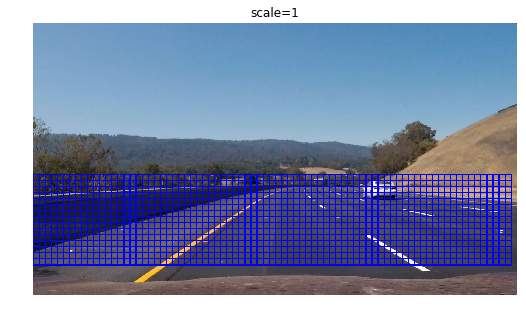

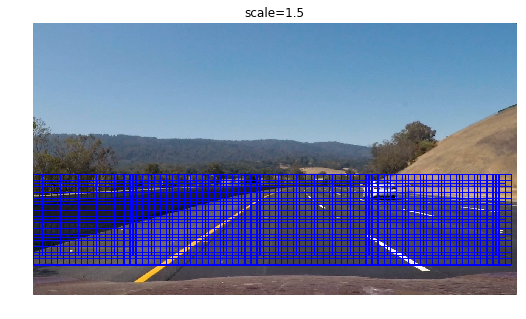

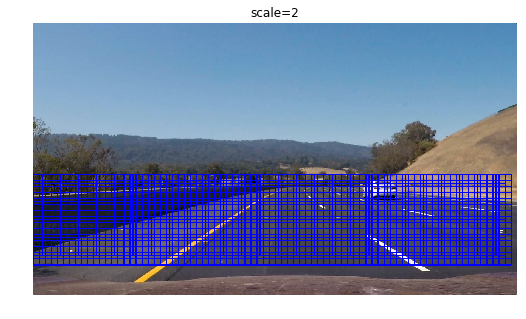

In [7]:
from classifier import Classifier
from ImagePlotter import ImagePlotter
from features import FeatureExtractor
from ImagePlotter import ImagePlotter
import matplotlib.image
%matplotlib inline

image = matplotlib.image.imread('test_images/test3.jpg')
y_start = 400
y_stop = 656
x_start = image.shape[1] // 2
x_stop = image.shape[1]

for scale in [1, 1.5, 2]:
    plotter = ImagePlotter(num_images=1, grid=(1, 1))
    extractor = FeatureExtractor(image,
                                (x_start, x_stop),
                                (y_start, y_stop),
                                 scale=scale)
    plotter(extractor.draw_features_windows(), title='scale={}'.format(scale))

/Users/mahidhar/courses/udacity/sdc/CarND-Vehicle-Detection/LaneFinder.py:70: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  histogram = np.sum(image[self._height/2:, :], axis=0)
/Users/mahidhar/anaconda/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


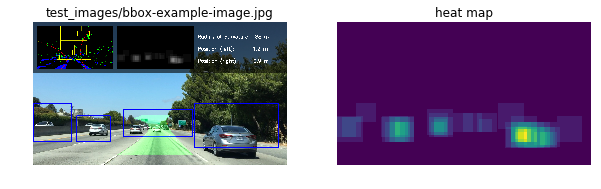

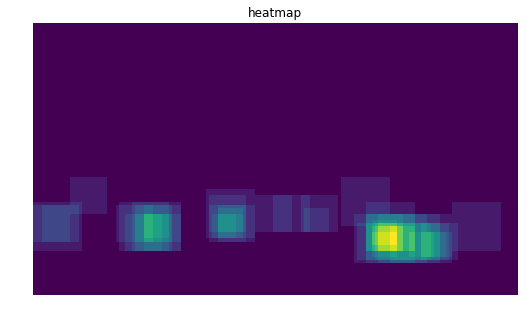

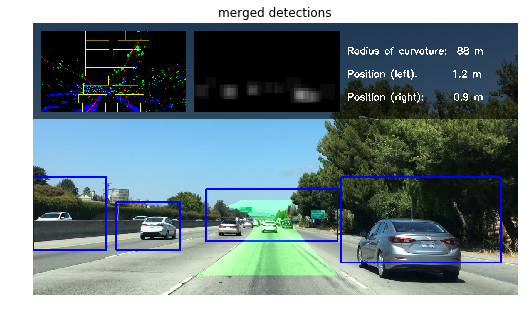

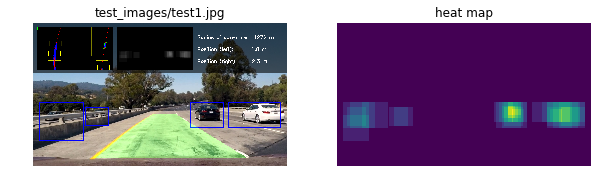

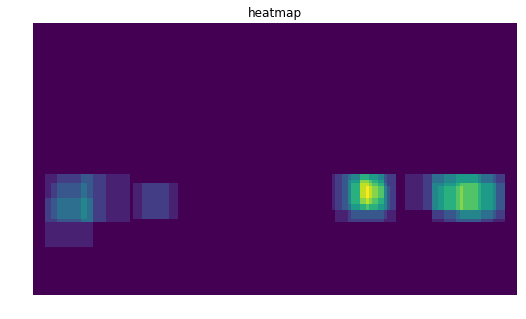

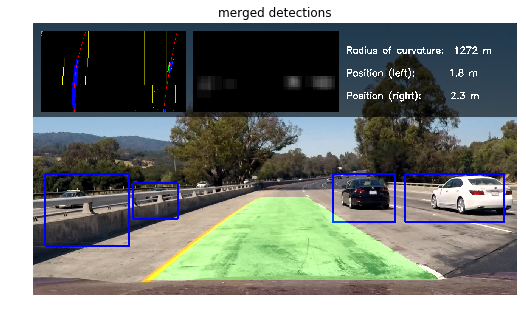

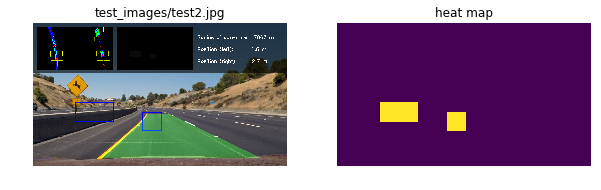

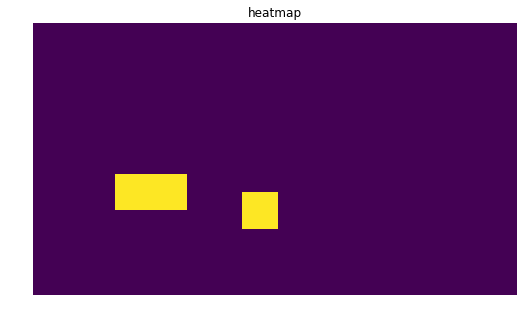

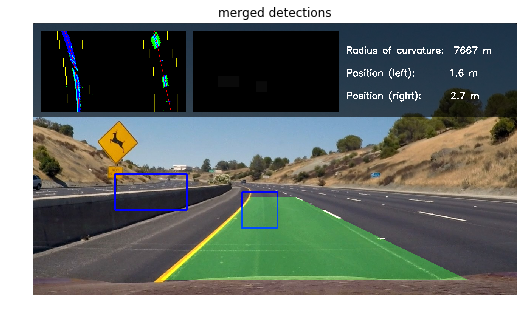

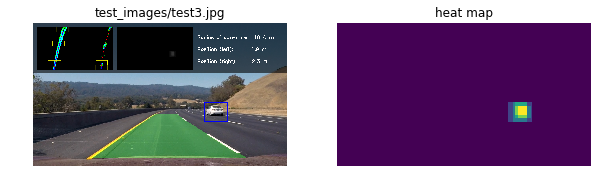

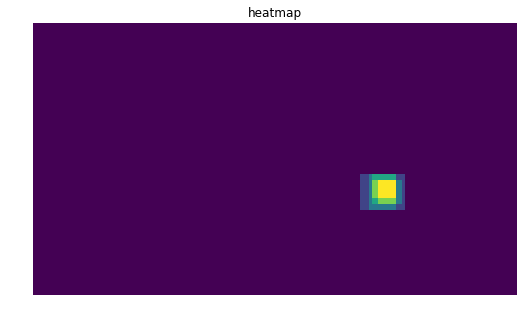

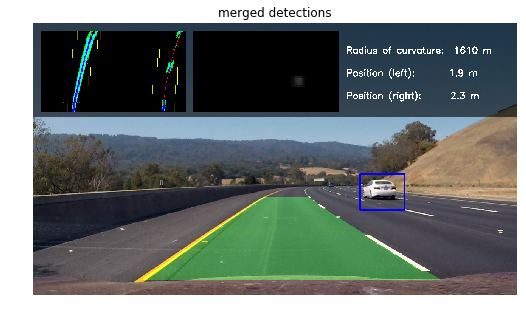

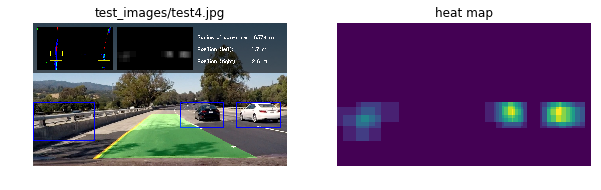

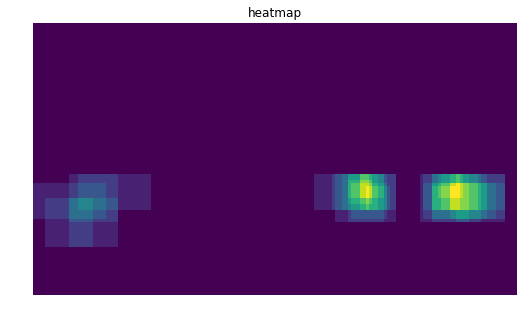

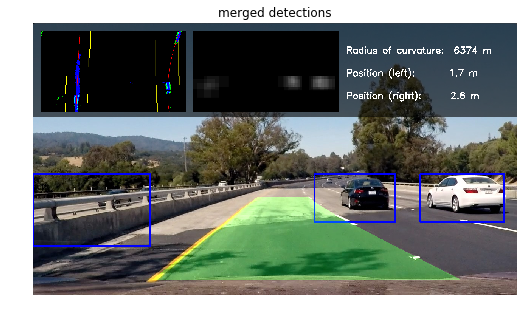

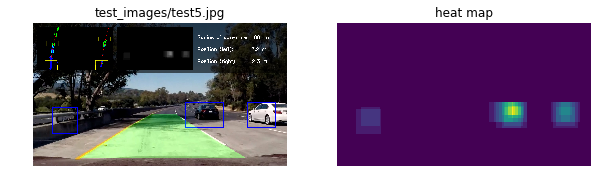

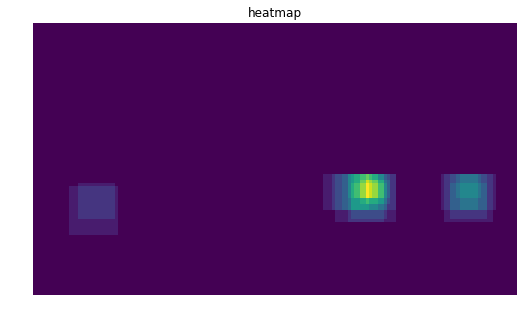

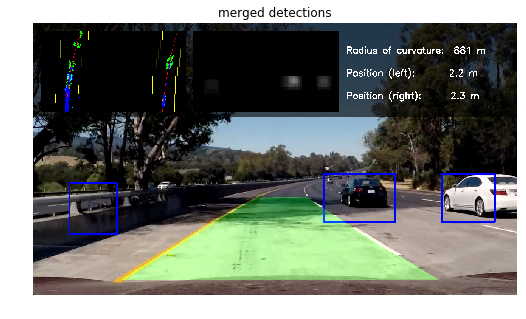

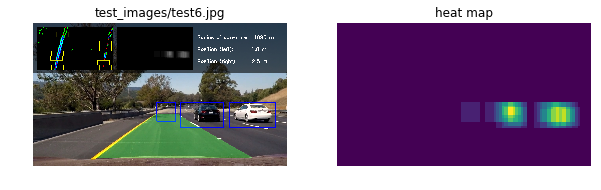

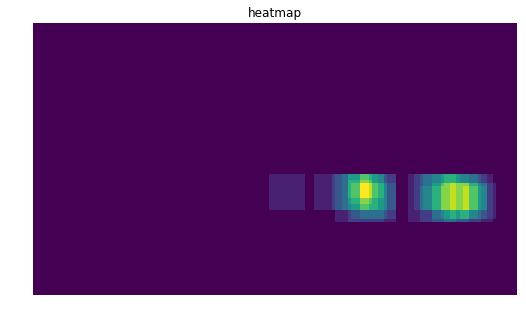

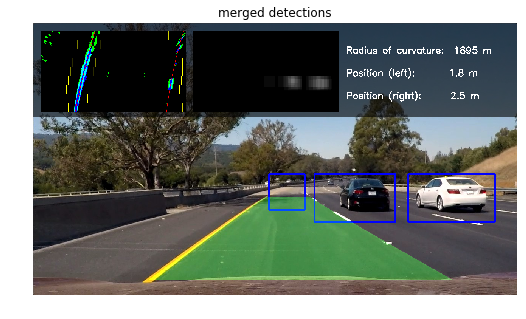

In [8]:
images = glob.glob('test_images/*.jpg')
for image_name in images:
    plotter = ImagePlotter(num_images=2, grid=(1, 2))
    image = matplotlib.image.imread(image_name)
    windows_image = np.copy(image)
    detector = VehicleDetector(calibrate(image), classifier)
    image = detector.detect_vehicles(image)
    for c in detector.detections():
        cv2.rectangle(windows_image, (c[0], c[1]), (c[2], c[3]), (0, 0, 255), 3)
    ImagePlotter(num_images=1, grid=(1,1))(detector.heat_map(), title='heatmap')
    ImagePlotter(num_images=1, grid=(1,1))(image, title='merged detections')
    plotter(image, title=image_name)
    plotter(detector.heat_map(), title='heat map')
    

In [9]:
#from moviepy.editor import VideoFileClip
#from vehicle_detector import VehicleDetector

#video_output_name = 'project_video_annotated_vehicles.mp4'
#video_output_name = 'test_video_annotated_vehicles.mp4'
#video = VideoFileClip("project_video.mp4")
#video = VideoFileClip("project_video.mp4").subclip(38,43)
#tracker = VehicleDetector(video.get_frame(0), classifier)
#video_output = video.fl_image(tracker.detect_vehicles)
#%time video_output.write_videofile(video_output_name, audio=False)